COMPUTER VISION (CE 632)
LAB EXPERIMENT - 2 


SUBMITTED BY : KAMAL KANDPAL

REG. No. 21-27-14  (DATA SCIENCE)

### IMPORTING THE LIBRARIES

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### IMPORTING THE IMAGE

In [3]:
image=cv2.imread("B2DBy.jpg")
# image2 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(image.shape)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

(300, 332, 3)


### INTRODUCING NOISE TO AN IMAGE

### 1. Salt and Pepper Noise

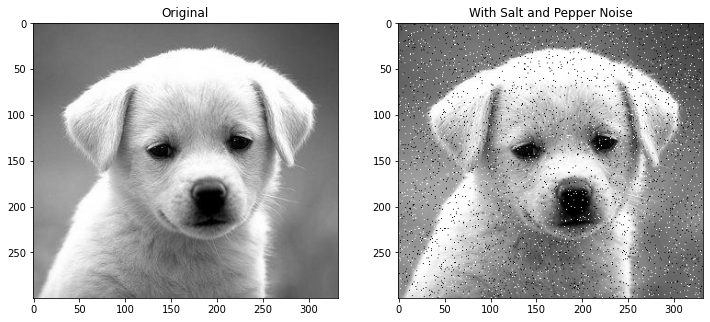

In [4]:
rows, columns, channels = image.shape    # This is called tuple unpacking.     # Add channels as well for a color image.

p = 0.05  #Lets say image has 5% noise (p is probability)
import random

output_image = np.zeros(image.shape,np.uint8)

for i in range(rows):
    for j in range(columns):
        r= random.random()
        if r<p/2:
            output_image[i][j] = [0,0,0]    # pepper(black) sprinkled
        elif r<p:
            output_image[i][j] = [255,255,255] # salt(white) sprinkled
        else:
            output_image[i][j] = image[i][j]
            

from matplotlib.pyplot import subplots
fig, ax = subplots(1,2, figsize = (12,20))

ax[0].set_title('Original')
ax[1].set_title('With Salt and Pepper Noise')
ax[0].imshow(image)
ax[1].imshow(output_image)


### 2. Gaussian Noise

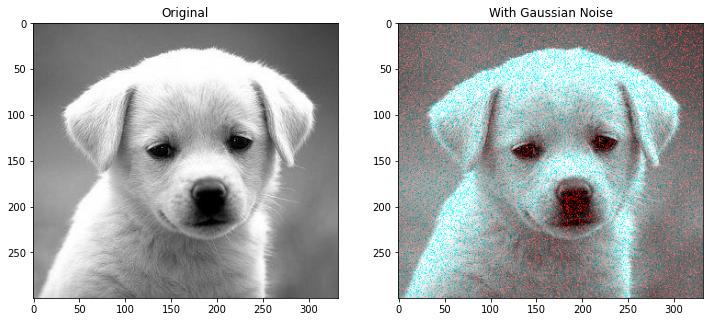

In [5]:
rows,columns, channels= image.shape

gaussian_noise = np.zeros(image.shape,dtype=np.uint8)

cv2.randn(gaussian_noise, 1, 200)   #mean value = 1 and  standard deviation = 200.

output_image2 = image + gaussian_noise

from matplotlib.pyplot import subplots
fig, ax = subplots(1,2, figsize = (12,20))

ax[0].set_title('Original')
ax[1].set_title('With Gaussian Noise')
ax[0].imshow(image)
ax[1].imshow(output_image2)

### 2D CONVOLUTION - IMAGE FILTERING

### 1. AVERAGING

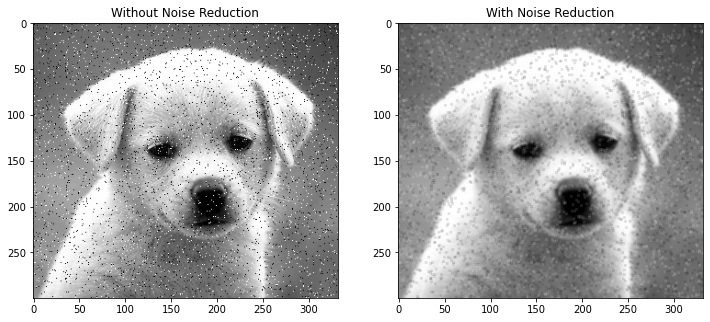

In [67]:
# kernel = np.ones((3,3),np.float32)/9
# Filtered_img = cv2.filter2D(image,-1, kernel)

blur = cv2.blur(output_image, (3,3))    # Same as above 2 lines!!

from matplotlib.pyplot import subplots
fig, ax = subplots(1,2, figsize = (12,20))

ax[0].set_title('Without Noise Reduction')
ax[1].set_title('With Noise Reduction')
ax[0].imshow(output_image)
ax[1].imshow(blur)

### 2. GAUSSIAN BLUR

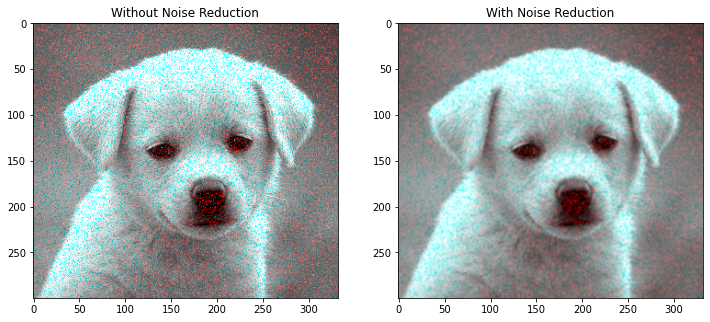

In [68]:
# Removing gaussian noise(output_image2) with gaussian blur.

Gaussian_Blur = cv2.GaussianBlur(output_image2, (3,3),0)

from matplotlib.pyplot import subplots
fig, ax = subplots(1,2, figsize = (12,20))

ax[0].set_title('Without Noise Reduction')
ax[1].set_title('With Noise Reduction')
ax[0].imshow(output_image2)
ax[1].imshow(Gaussian_Blur)

### 3. MEDIAN BLUR

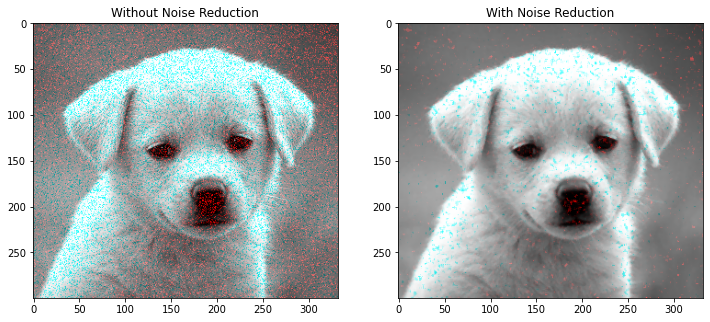

In [69]:
# This is highly effective against salt-and-pepper noise in an image.

Median_blur = cv2.medianBlur(output_image2,3)

from matplotlib.pyplot import subplots
fig, ax = subplots(1,2, figsize = (12,20))

ax[0].set_title('Without Noise Reduction')
ax[1].set_title('With Noise Reduction')
ax[0].imshow(output_image2)
ax[1].imshow(Median_blur)